NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [18]:
pd.read_csv('cleaned_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_dataset.csv'

In [21]:
#import os
#print(os.listdir())
os.chdir('/Users/user/Documents/projects/Airline Delays')
print(os.getcwd())

/Users/user/Documents/projects/Airline Delays


In [23]:
df = pd.read_csv('cleaned_dataset.csv')

In [20]:
import os
print(os.listdir())

['online_retail', 'sales-analytics', '.DS_Store', 'anaconda_projects', 'Untitled.ipynb', 'Airline Delays', 'data_profiling', 'IBM HR Analytics Employee Attrition & Performance.csv', 'FINAL PROJECT SQL COURSE', 'amazon-reviews-analysis', 'Diabetes', 'TLS', '.virtual_documents', 'GOALLLL.png', '.ipynb_checkpoints', 'data', 'RetailRocket Funnel Analysis', 'SQL']


In [27]:
carrier_agg = df.groupby(['carrier', 'carrier_name']).agg({
    'delay_rate': 'mean',
    'arr_flights': 'sum',
    'arr_delay': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

In [29]:
top_5 = carrier_agg.sort_values('delay_rate', ascending = False).head(5)

In [46]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
top_5['total_delay'] = top_5[delay_cols].sum(axis=1)
for col in delay_cols:
    top_5[col + '_pct'] = (top_5[col] / top_5['total_delay'])* 100
pct_cols = [col + '_pct' for col in delay_cols]

In [48]:
top_5.head(5)
pct_cols


['carrier_delay_pct',
 'weather_delay_pct',
 'nas_delay_pct',
 'security_delay_pct',
 'late_aircraft_delay_pct']

In [60]:
plt.figure(figsize = (10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [43]:
colors = ['#002147', '#264785', '#5F7EE2', '#98B4FF', '#EDC948']
labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

In [45]:
bottom = [0] * len(top_5)

/var/folders/8r/w2tfcf3d63b2dfp05x4fmyx40000gn/T/ipykernel_77303/2470789395.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


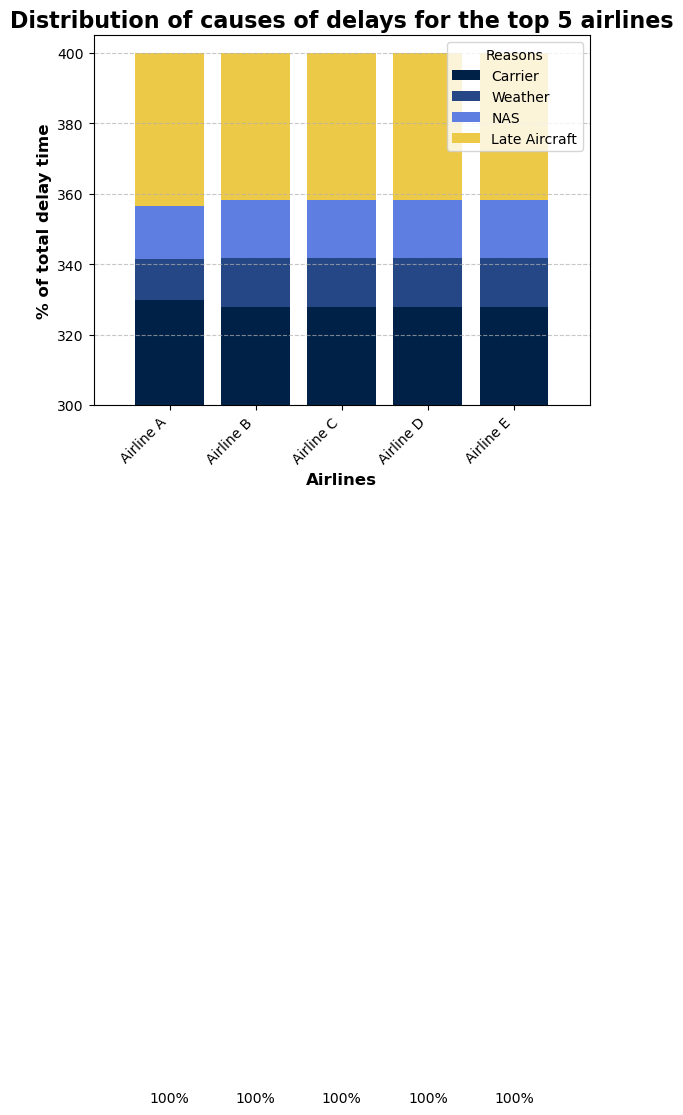

In [61]:
for i, col in enumerate([x + '_pct' for x in delay_cols]):
    plt.bar(top_5['carrier_name'], top_5[col], bottom=bottom, color=colors[i], label=labels[i])

    for j in range(len(bottom)):
        bottom[j] += top_5.iloc[j][col]


plt.xticks(rotation=45, ha='right')


plt.title('Distribution of causes of delays for the top 5 airlines', fontsize=16, fontweight='bold')
plt.xlabel('Airlines', fontsize=12, fontweight='bold')
plt.ylabel('% of total delay time', fontsize=12, fontweight='bold')


plt.legend(title='Reasons', loc='upper right')


for i, carrier in enumerate(top_5['carrier_name']):
    total = top_5.loc[top_5['carrier_name'] == carrier, [x + '_pct' for x in delay_cols]].values.sum()
    plt.text(i, total + 2, f'{total:.0f}%', ha='center', fontsize=10, color='black')


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.margins(x=0.1)
plt.tight_layout()


plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/stacked_causes_delays.png', dpi=300, bbox_inches='tight')

# Показать график
plt.show() 
 